In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from math import log
from generate_patients import Patient
from IPython.core.display import display, HTML
from matplotlib.colors import BoundaryNorm, Normalize
import seaborn as sns

In [2]:
display(HTML("<style>.container { width:65% !important; }</style>"))
plt.interactive(True)
%matplotlib inline
# plt.rcParams['figure.figsize'] = [28, 8]
plt.rcParams['figure.figsize'] = [16, 6]

In [3]:
def normalize(a):
    x = np.log(a)
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [4]:
with open('patients.obj', 'rb') as patients_file:
    patients = pickle.load(patients_file)
    
print(len(patients))

79


In [5]:
n = 4  # Patient number

# Print patient's features
print('ID: %s' % patients[n].features[0])
print('pse: %s' % patients[n].features[1])
print('psp1: %s' % patients[n].features[2])
print('psp2: %s' % patients[n].features[3])
print('psp3: %s' % patients[n].features[4])
print('pspf1: %s' % patients[n].features[5])
print('pspf2: %s' % patients[n].features[6])
print('pspf3: %s' % patients[n].features[7])
print('wpsp: %s' % patients[n].features[8])
print('cpt: %s' % patients[n].features[9])
print('faller: %s' % patients[n].features[10])
print('faller_3M: %s' % patients[n].features[11])
print('faller_6M: %s' % patients[n].features[12])
print('faller_9M: %s' % patients[n].features[13])
print('faller_12M: %s' % patients[n].features[14])
print('age: %s' % patients[n].features[15])

ID: 5.0
pse: 10.330712263127852
psp1: 4.040129156776106
psp2: 2.3844288783187997
psp3: 1.1687221309911873
pspf1: 15.0
pspf2: 4.0
pspf3: 19.0
wpsp: 56.561808194865485
cpt: 0.038136489705764554
faller: 1.0
faller_3M: 0.0
faller_6M: 0.0
faller_9M: 0.0
faller_12M: 1.0
age: 70.0


# Whole data

Text(0.5, 0, 'Sample [100/s]')

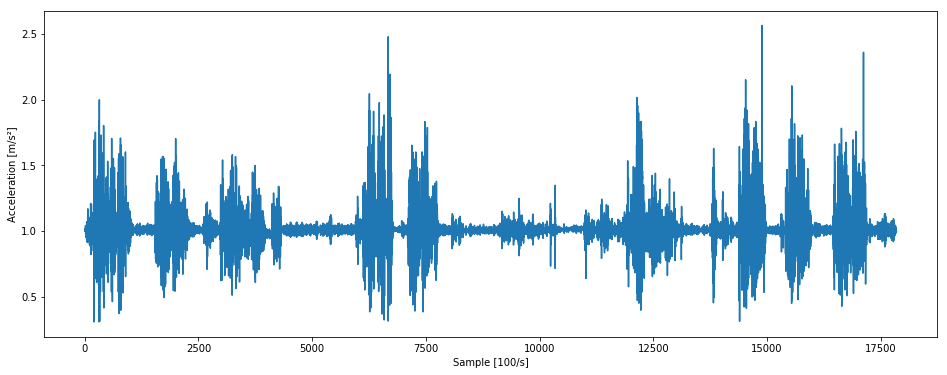

In [6]:
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

Text(0.5, 0, 'Frequency [Hz]')

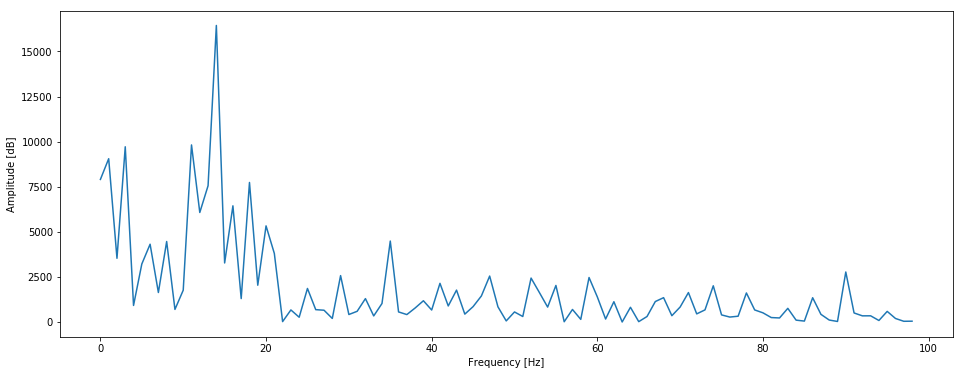

In [7]:
plt.plot(patients[n].fft)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')

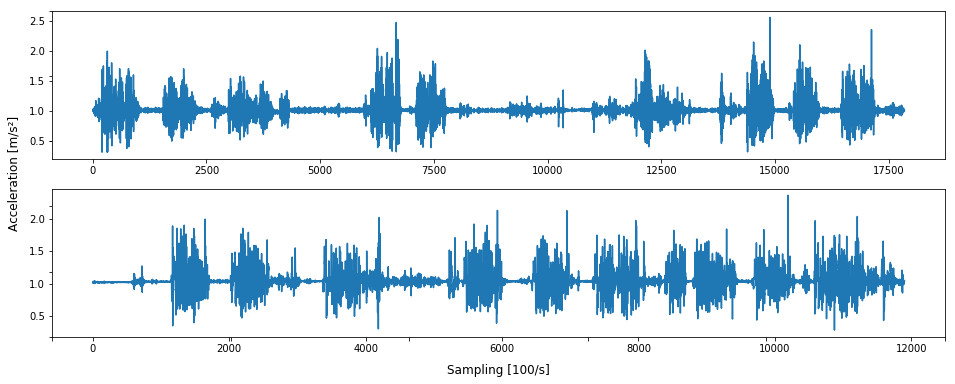

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_xlabel('Sampling [100/s]', labelpad=20, fontsize=12)
ax.set_ylabel('Acceleration [m/s²]', labelpad=25, fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])
# plt.title('Sinais de aceleração no domínio do tempo (em amostras)')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(patients[4].data)
ax2.plot(patients[13].data)

plt.show()

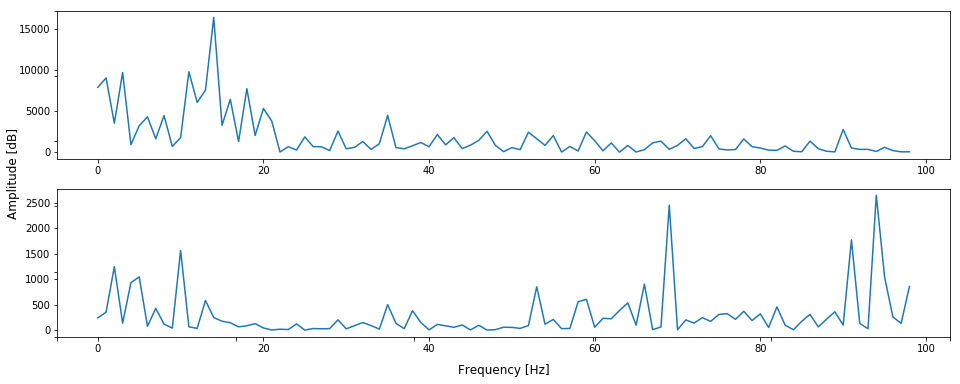

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_xlabel('Frequency [Hz]', labelpad=20, fontsize=12)
ax.set_ylabel('Amplitude [dB]', labelpad=30, fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])
# plt.title('Sinais de aceleração no domínio do tempo (em amostras)')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(patients[4].fft)
ax2.plot(patients[13].fft)

plt.show()

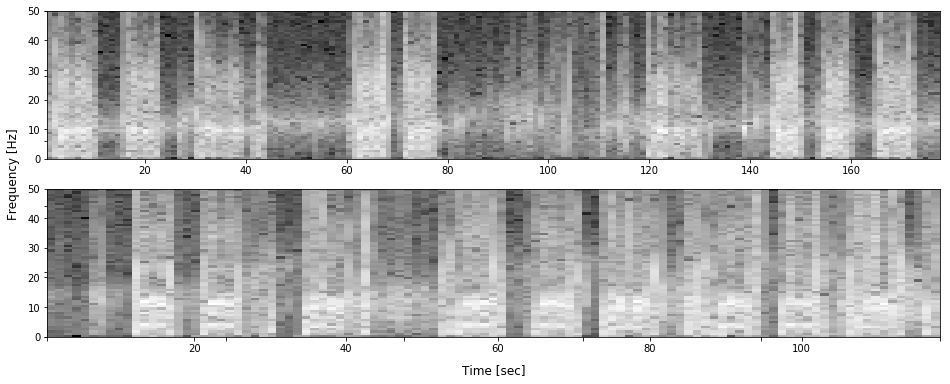

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_xlabel('Time [sec]', labelpad=20, fontsize=12)
ax.set_ylabel('Frequency [Hz]', labelpad=20, fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])
# plt.title('Sinais de aceleração no domínio do tempo (em amostras)')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

f, t, Sxx = signal.spectrogram(patients[4].data, fs=100, nperseg=128)
ax1.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))

f, t, Sxx = signal.spectrogram(patients[13].data, fs=100, nperseg=128)
ax2.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))

plt.show()

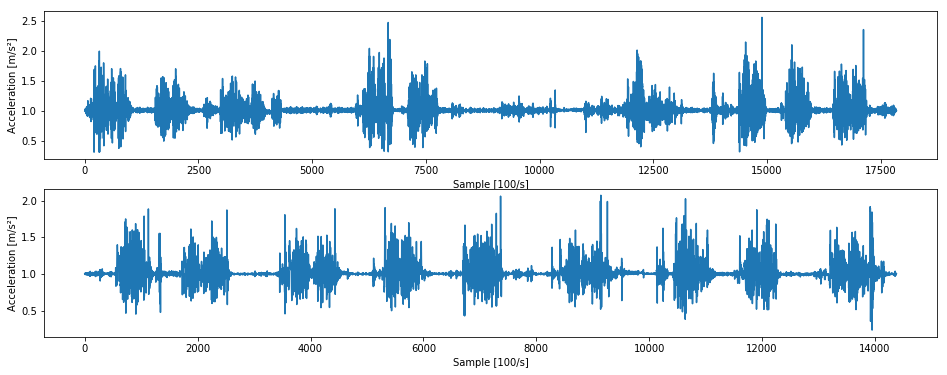

In [11]:
plt.subplot(211)
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.plot(patients[n+1].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.show()

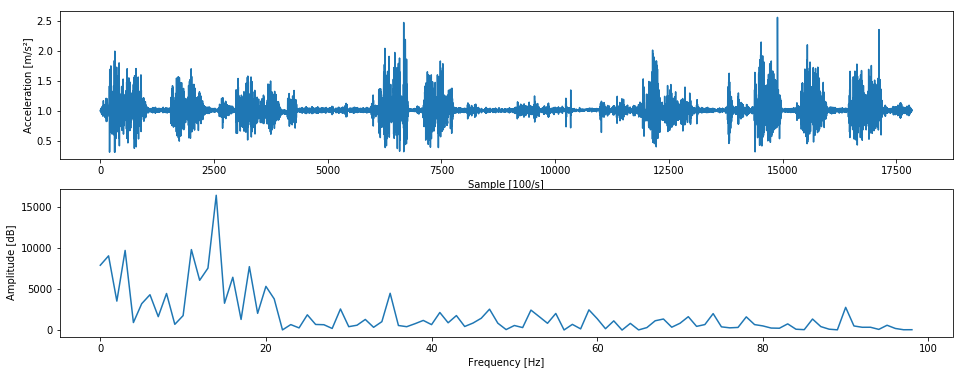

In [12]:
plt.subplot(211)
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.plot(patients[n].fft)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')

plt.show()

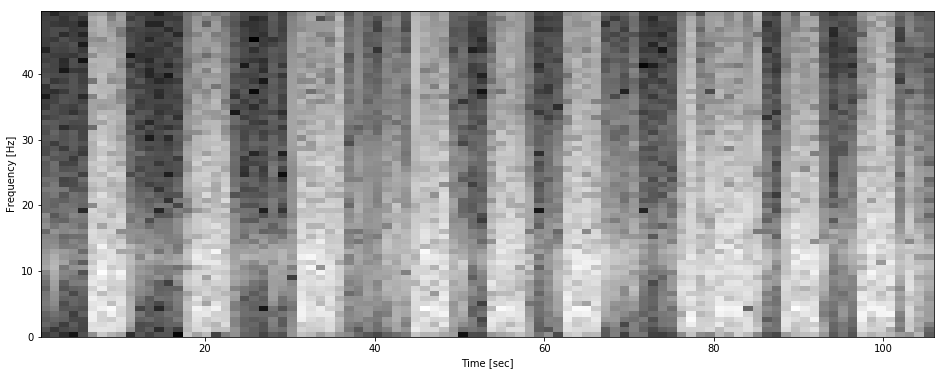

In [13]:
f, t, Sxx = signal.spectrogram(patients[0].data, fs=100, nperseg=127)

plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [14]:
x, y, specgrams = [], [], []
for patient in patients:
    _, _, Sxx = signal.spectrogram(patient.data, fs=100, nperseg=127)
    a = normalize(Sxx)
    if a.shape[1] >= 68:
        specgrams.append(a)
        y.append(a.shape[0])
        x.append(a.shape[1])

print(sorted(y))
print(sorted(x))

try:
    with open('spectrograms.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
[68, 70, 71, 74, 75, 76, 76, 77, 77, 78, 78, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 84, 84, 84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 94, 95, 95, 95, 96, 97, 97, 98, 98, 98, 100, 100, 102, 103, 104, 106, 107, 107, 107, 108, 112, 115, 117, 118, 119, 121, 122, 128, 145, 156, 159]


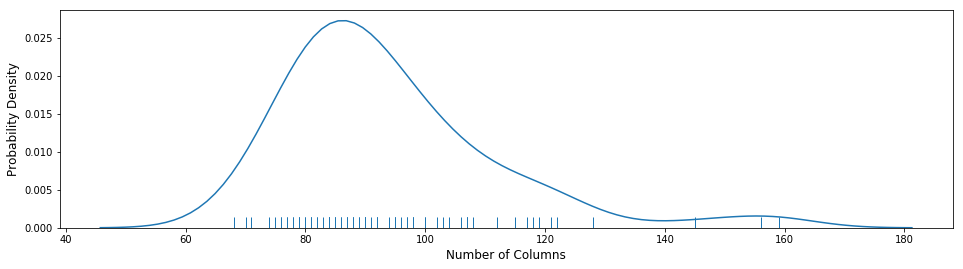

In [15]:
plt.rcParams['figure.figsize'] = [16, 4]
sns.distplot(x, bins=None, hist=False, kde=True, rug=True)
plt.xlabel('Number of Columns', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()

# Segmented TUGS (some patients have less than 9 TUGs)

In [16]:
valid_patients = [patient for patient in patients if patient.features[10] >= 0 and len(patient.tugs) == 9]  # Remove excluded patients and patients with less than 9 TUGs

print('Total patients: %s' % len(patients))
print('Wrong patients: %s' % (len(patients) - len(valid_patients)))
print('Valid patients: %s' % len(valid_patients))

Total patients: 79
Wrong patients: 7
Valid patients: 72


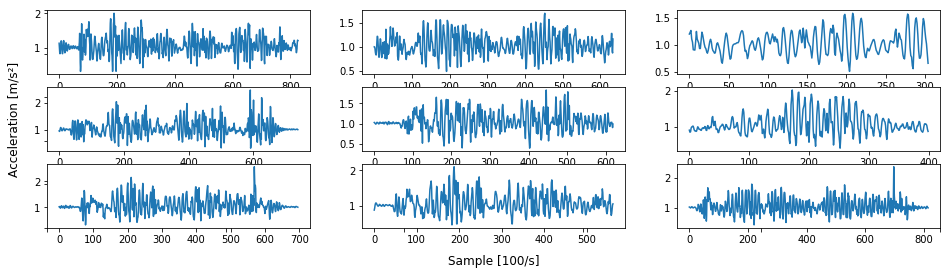

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_xlabel('Sample [100/s]', labelpad=20, fontsize=12)
ax.set_ylabel('Acceleration [m/s²]', labelpad=20, fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])
# plt.title('Sinais de aceleração no domínio do tempo (em amostras)')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    ax_inner = fig.add_subplot(3, 3, i+1)
    ax_inner.plot(patients[n].data[tug_begin:tug_end])

plt.show()

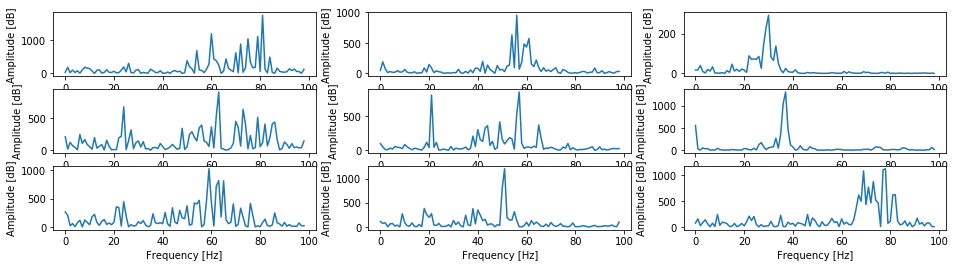

In [18]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    tug_fft = pow(abs(np.fft.rfft(patients[n].data[tug_begin:tug_end])), 2)[1:100]
    plt.subplot(3, 3, i+1)
    plt.plot(tug_fft)
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

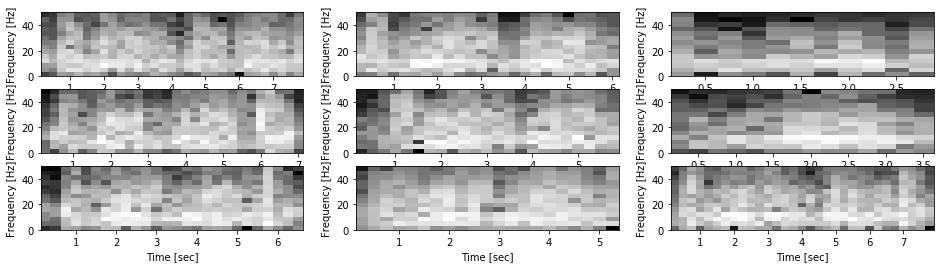

In [19]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    f, t, Sxx = signal.spectrogram(patients[n].data[tug_begin:tug_end], fs=100, nperseg=28)
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

# Concatenated Segmented TUGs

In [20]:
concatenated = np.ndarray(0)
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    concatenated = np.append(concatenated, patients[n].data[tug_begin:tug_end])
    
f, t, Sxx = signal.spectrogram(concatenated, fs=100, nperseg=38)

In [21]:
a = normalize(Sxx)
a.shape

(20, 164)

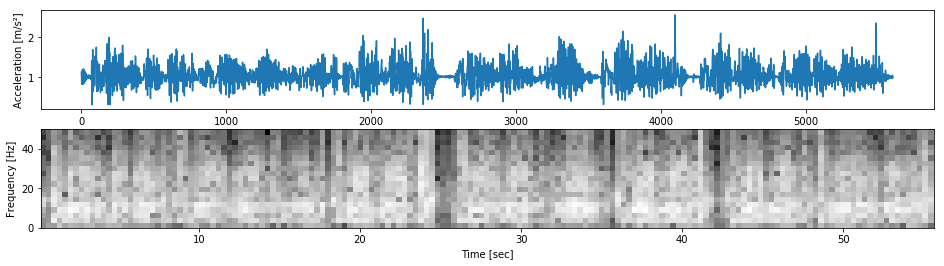

In [22]:
plt.subplot(211)
plt.plot(concatenated)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

In [23]:
x, x_original, y, specgrams, tugs_concatenated, labels = [], [], [], [], [], []

for patient in valid_patients:
    concatenated = np.ndarray(0)
    for i in range(9):
        tug_begin = patient.tugs[i][0]
        tug_end = patient.tugs[i][1]
        concatenated = np.append(concatenated, patient.data[tug_begin:tug_end])
    tugs_concatenated.append(concatenated)
    labels.append(int(patient.features[10]))

max_columns, row_size = 200, 20
for specgram, label in zip(tugs_concatenated, labels):
        f, t, Sxx = signal.spectrogram(specgram, fs=100, nperseg=38)
        a = normalize(Sxx)
        x_original.append(a.shape[1])
        if a.shape[1] < 200:
            zero_columns = np.zeros((row_size, max_columns - a.shape[1]))
        a = np.append(a, zero_columns, axis=1)[:, :max_columns]
        specgrams.append({'specgram':a, 'label': label})
        y.append(a.shape[0])
        x.append(a.shape[1])


print(sorted(y))
print(sorted(x))
print(sorted(x_original))
# print(labels)

try:
    with open('spectrograms_tugs.pkl', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]
[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
[102, 104, 107, 108, 109, 109, 110, 110, 112, 113, 115, 117, 118, 118, 118, 119, 119, 119, 119, 122, 123, 123, 125, 126, 127, 129, 129, 130, 130, 132, 132, 133, 135, 136, 137, 138, 138, 139, 141, 141, 142, 144, 144, 144, 148, 148, 148, 148, 149, 149, 154, 156, 160, 160, 163, 164, 164, 164, 168, 176, 176, 177, 177, 181, 182, 190, 190, 200, 200, 215,

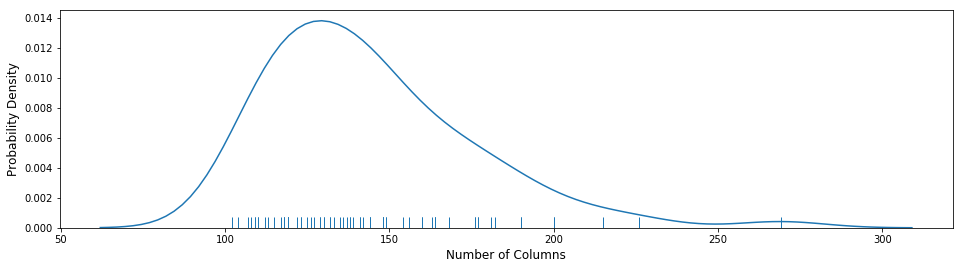

In [24]:
plt.rcParams['figure.figsize'] = [16, 4]
sns.distplot(x_original, bins=None, hist=False, kde=True, rug=True)
plt.xlabel('Number of Columns', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.show()

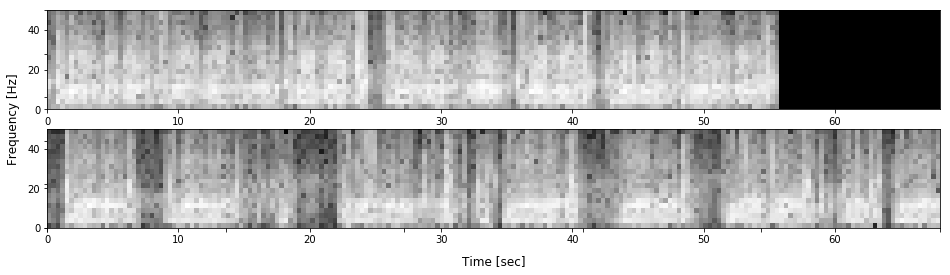

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)    # The big subplot
ax.set_xlabel('Time [sec]', labelpad=20, fontsize=12)
ax.set_ylabel('Frequency [Hz]', labelpad=20, fontsize=12)
ax.set_yticklabels([])
ax.set_xticklabels([])
# plt.title('Sinais de aceleração no domínio do tempo (em amostras)')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

    
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.imshow(specgrams[3]['specgram'], cmap="gray", aspect='auto', origin='lower', extent=[0, 68, 0, 50])
ax2.imshow(specgrams[11]['specgram'], cmap="gray", aspect='auto', origin='lower', extent=[0, 68, 0, 50])

plt.show()